<a href="https://colab.research.google.com/github/Diana241099/Python/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
!ls '/root/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1'

ls: cannot access '/root/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1': No such file or directory


In [ ]:
!ls /kaggle/input/students-performance-in-exams/StudentsPerformance.csv

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [ ]:
import pandas as pd

try:
  df = pd.read_csv("/root/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1/StudentsPerformance.csv")
except:
  df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
#check the value couts of the coliumns that consist of strings
print(df['gender'].value_counts())
print('\n')

print(df['race/ethnicity'].value_counts())
print('\n')

print(df['parental level of education'].value_counts())
print('\n')

print(df['lunch'].value_counts())
print('\n')

print(df['test preparation course'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course
none         642
completed    358
Name: count, dtype: int64


In [ ]:
#manually encoding gender
df["gender"] = df["gender"].map({"male": 0, "female": 1})

#manually encoding parental level of education
df["parental level of education"] = df["parental level of education"].map({
    "some college": 1,
    "associate's degree": 2,
    "high school": 3,
    "some high school": 4,
    "bachelor's degree": 5,
    "master's degree": 6
})

#manually encoding lunch
df["lunch"] = df["lunch"].map({
    "standard": 1,
    "free/reduced": 2
})

#manually encoding test preparation course
df["test preparation course"] = df["test preparation course"].map({
    "none": 1,
    "completed": 2
})

#manually encoding race/ethnicity
df["race/ethnicity"] = df["race/ethnicity"].map({
    "group A": 1,
    "group B": 2,
    "group C": 3,
    "group D": 4,
    "group E": 5
})


print(df[['gender', 'race/ethnicity', 'test preparation course', 'lunch', "parental level of education"]].head())
print(df.columns)

   gender  race/ethnicity  test preparation course  lunch  \
0       1               2                        1      1   
1       1               3                        2      1   
2       1               2                        1      1   
3       0               1                        1      2   
4       0               3                        1      1   

   parental level of education  
0                            5  
1                            1  
2                            6  
3                            2  
4                            1  
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


What question does logistic regression answer.

linear regression

math_score_number = m * X + b

ln ( odds ) = ln (sucess / failure ) = e^(m * X + b)



logistic regression what is the probability that math_score_number >= some threshold (60)

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,5,1,1,72,72,74
1,1,3,1,1,2,69,90,88
2,1,2,6,1,1,90,95,93
3,0,1,2,2,1,47,57,44
4,0,3,1,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,1,5,6,1,2,88,99,95
996,0,3,3,2,1,62,55,55
997,1,3,3,2,2,59,71,65
998,1,4,1,1,2,68,78,77


In [ ]:
from sklearn.preprocessing import LabelEncoder



encoder = LabelEncoder()


encoded_labels = encoder.fit_transform(df["parental level of education"])



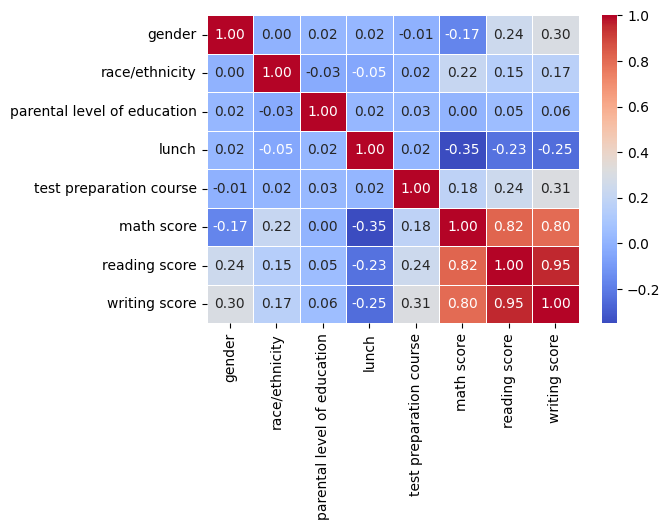

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#fetch the data
data = df

#the columns
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']

#select the data from the columns
data_selected = data[columns]

#calculate correlation matrix
cor_matrix = data_selected.corr()

#plot the map
plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

Remember this is labelled data.  supervised machine learning model.  it means that you have X (independent variables) and y (y = mx + b) is draw from some actual data


what we do with modelling is make a predictive of y_pred

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

#create a new column for "passed" based on math score
df['passed_math'] = (df['math score'] >= 60).astype(int)  #1 if score >= 60, else 0

#select features (X) and target (y)
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['passed_math']

#create logistic regression model
reg = LogisticRegression()

#fit the model
reg.fit(X, y)

#predict
predictions = reg.predict(X)

#check accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, predictions))


Accuracy: 0.713


Don't forget student we must use rules that data scientists use.  Which split the data into training and test.

You don't want to use all of the data in the training .  why ?  because we need to test the algorithm

also danger of overfitting




In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is called df

# random seed is given explicitly.

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#suppress the sklearn warning
warnings.filterwarnings("ignore", message=".*X does not have valid feature names.*")

#create a new column for "passed" based on math score
df['passed_math'] = (df['math score'] >= 60).astype(int)  #1 if score >= 60, else 0

#select features (X) and target (y)
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['passed_math']

#create logistic regression model
reg = LogisticRegression()

#fit the model.

reg.fit(X, y)

#predict on the whole dataset
predictions = reg.predict(X)

#check accuracy
print("Accuracy:", accuracy_score(y, predictions))

#limit the number of predictions
limit = 100
for i in range(min(limit, X.shape[0])):  #only loop through the first 100 predictions
    p = np.array(X.iloc[i]).reshape(1, -1)
    pred = reg.predict(p)

    #print(f"x[{i}] = {X.iloc[i].values}, actual value = {y.iloc[i]}, predicted value = {pred[0]}")


Accuracy: 0.713


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"MSE: {mse}")
print(f"R^2: {r2}")


MSE: 0.287
R^2: -0.31247399060689385


In [ ]:
passed=pd.Series(predictions)
passed.name = "passed"



In [ ]:
passed

,passed
0,1
1,1
2,1
3,0
4,1
...,...
995,1
996,1
997,1
998,1


In [ ]:
pd.concat([X,y,passed],axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,passed_math,passed
0,1,2,5,1,1,1,1
1,1,3,1,1,2,1,1
2,1,2,6,1,1,1,1
3,0,1,2,2,1,0,0
4,0,3,1,1,1,1,1
...,...,...,...,...,...,...,...
995,1,5,6,1,2,1,1
996,0,3,3,2,1,1,1
997,1,3,3,2,2,0,1
998,1,4,1,1,2,1,1


if your accuracy is say 50%

then that is what we called guessing

what could have gone wrong:

1.  code erring

2.  assumptions were wrong

